In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
from scipy.linalg import solve_banded

# Define domain and parameters
nx = 100
ntimes = 100
xmax = 1. # the distance across the domain
endtime = 2. # the time it takes for water to flow across the domain, 2 flow times
dt = endtime/(ntimes-1.)
dx = xmax/(nx-1.)
Pe = 50. #50 is relatively dispersive

# Creating A array
A_upper = dt*(1./(4*dx) - 1./(2.*Pe*dx**2))*ones(nx-2)
A_mid = (1. + dt/(Pe*dx**2))*ones(nx-2)
A_lower = dt*(-1./(4*dx) - 1./(2.*Pe*dx**2))*ones(nx-2)
A_upper[0] = 0.
A_lower[-1] = 0.
A = vstack((A_upper, A_mid, A_lower))

# Creating concentration array and set boundary conditions
C = zeros([ntimes, nx])
C_up = 1.
C_down = 0.
C[:,0] = C_up #set upstream boundary concentration
C[:,-1] = C_down # set downstream boundary concentration

# for loop
for n in arange(ntimes-1):
    b = C[n,1:-1]*(1. - dt/(2.*Pe*dx**2)) \
        + C[n,2:]*dt*(-1./(4.*dx) + 1./(2.*Pe*dx**2)) \
        + C[n,0:-2]*dt*(1./(4.*dx) + 1./(2.*Pe*dx**2))
    b[0] += C_up*dt*(1./(4.*dx) + 1./(2.*Pe*dx**2))
    b[-1] += C_down*dt*(-1./(4.*dx) + 1./(2.*Pe*dx**2))
    C[n+1,1:-1] = solve_banded((1,1), A, b)

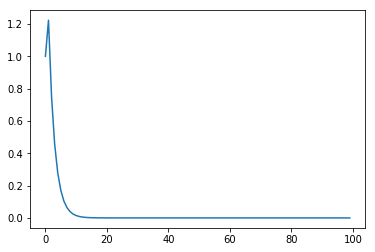

In [21]:
plot(C[1,:])
#plot(C[30,:])
#plot(C[60,:])